# $12^{th}$ excercises - 12.3: Digit recognition
## Notebook setup
#### Used libraries

In [2]:
from PIL import Image
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

## The excercise
Here we will check how the two models we built works on never seen data. 

First of all we load the digits we wrote.

In [3]:
img_rows = 28
img_cols = 28
data = np.ndarray(shape=(10,img_rows,img_cols))

for digit in range(10) :
    file = "in/" + str(digit) + ".png"
    imm  = Image.open(file).convert('L') 
    ydim, xdim = imm.size
    pix=imm.load()
    data[digit]= np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[digit][i,j]=pix[j,i]
            
    
data = data.astype('float32')
data /= 255
print(data.shape)

(10, 28, 28)


Then we load the models.

In [5]:
path = "store/"
model_DNN=load_model(path+"121-DNN-model.tf")
model_CNN=load_model(path+"122-CNN-model.tf")

And finally we make the predictions.

#### DNN

1/1 [==============================] - 0s 196ms/step


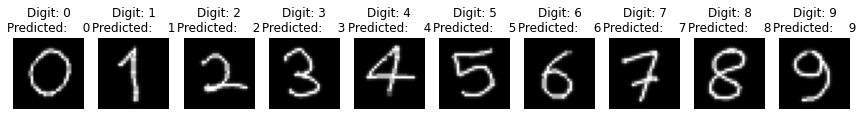

In [6]:
data_formatted = data.reshape(data.shape[0], img_rows*img_cols)

predictions_DNN = model_DNN.predict(data_formatted)

data_formatted = data.reshape(data.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data_formatted[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(i, np.argmax(predictions_DNN[i])))    
    plt.axis('off') 
plt.show()

#### CNN

1/1 [==============================] - 0s 133ms/step


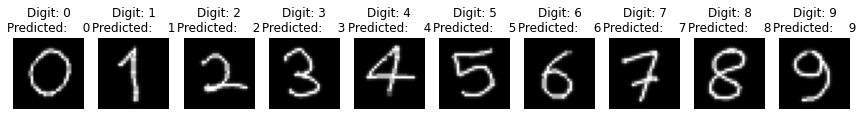

In [7]:
if keras.backend.image_data_format() == 'channels_first':
    data_formatted = data.reshape(data.shape[0], 1, img_rows, img_cols)
else:
    data_formatted = data.reshape(data.shape[0], img_rows, img_cols, 1)

predictions_CNN = model_CNN.predict(data_formatted)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data_formatted[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(i, np.argmax(predictions_CNN[i])))    
    plt.axis('off') 
plt.show()